# Завдання 1

In [191]:
import numpy as np
import matplotlib.pyplot as plt

In [192]:
# Параметри
a = 84.18e-6
L = 0.02
T = 2  # в секундах
N = 20
h = 0.015  # крок по часу
M = int(T / h)  # кількість кроків по часу
dy = L / N

In [193]:
# Ініціалізація температури
u = np.zeros(N + 1)  # включаючи граничні точки
u_new = np.zeros_like(u)

middle_point = int((N + 1) / 2)
u_new[middle_point - 1] = 30
u_new[middle_point] = 30
u_new[middle_point + 1] = 30

In [194]:
# Граничні умови
def phi1(t): return 7
def phi2(t): return 26

In [195]:
# Права частина СЗДР
def rhs(u, t):
  du = np.zeros_like(u)
  for i in range(1, N):
    du[i] = a * (u[i - 1] - 2 * u[i] + u[i + 1]) / dy**2
  return du

In [196]:
# Метод Рунге-Кутта 4-го порядку
def rk4_step(u, t, h):
  k1 = rhs(u, t)
  k2 = rhs(u + 0.5 * h * k1, t + 0.5 * h)
  k3 = rhs(u + 0.5 * h * k2, t + 0.5 * h)
  k4 = rhs(u + h * k3, t + h)
  return u + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

In [197]:
# Часова сітка
time = np.linspace(0, T, M + 1)
results = []

In [198]:
# Часова еволюція
for n in range(M + 1):
  t = n * h
  u[0] = phi1(t)
  u[N] = phi2(t)
  results.append(u.copy())
  u = rk4_step(u, t, h)

Ці попередження (RuntimeWarning) означають, що в обчисленнях виникають дуже великі значення (переповнення) або недопустимі операції (наприклад, додавання nan). Основна причина — занадто великий коефіцієнт дифузії a у поєднанні з малим кроком по простору dy

для вирішення можна
1. Зменшити a для тесту (небажано — тоді не моделюється алюміній).
2. Збільшити dy, тобто зменшити кількість вузлів N (наприклад, N = 20 або нвіть N = 10).

RuntimeWarning лишились. Вони показують, шо числове рішення "злітає" — тобто стає надто великим, навіть із новим N. Це буває у явних числових методах (навіть Рунге-Кутта), коли порушено умову стійкості.

шоб забрати помилки, можнв зменшити крок h до, наприклад, 0.005:

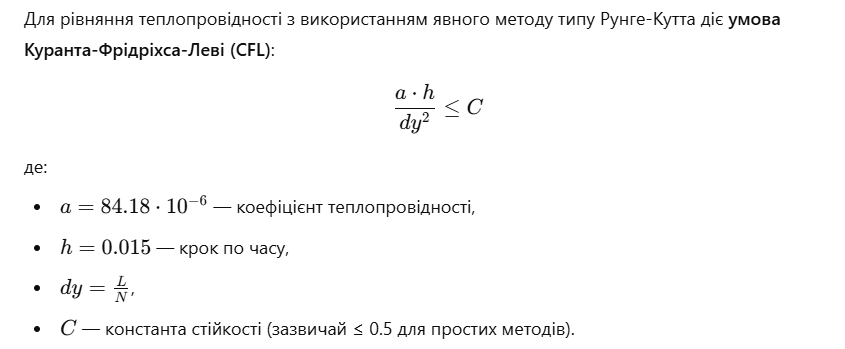

In [199]:
h = 0.005  # крок по часу
M = int(T / h)  # кількість кроків по часу

In [200]:
def check_cfl():
  cfl = a * h / dy**2
  print("CFL =", cfl)
  if cfl > 0.5:
    print("Порушено умову стійкості! Рішення може бути нестабільним.")

In [201]:
check_cfl()

CFL = 0.42090000000000005


In [202]:
# Ініціалізація температури
u = np.zeros(N + 1)  # включаючи граничні точки
u_new = np.zeros_like(u)

middle_point = int((N + 1) / 2)
u_new[middle_point - 1] = 30
u_new[middle_point] = 30
u_new[middle_point + 1] = 30

In [203]:
time = np.linspace(0, T, M + 1)
results = []

for n in range(M + 1):
  t = n * h
  u_new[0] = phi1(t)
  u_new[N] = phi2(t)
  results.append(u_new.copy())
  u_new = rk4_step(u_new, t, h)

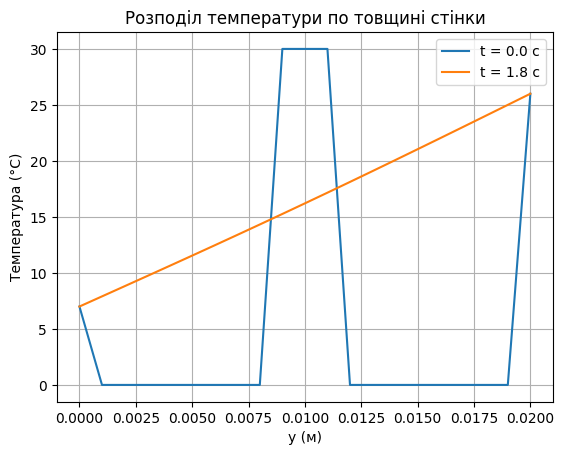

In [204]:
# Побудова графіку
Y = np.linspace(0, L, N + 1)
T_vals = [0, int(M / 4), int(M / 2), M]
plt.plot(Y, results[0], label=f"t = {0 * h:.1f} c")
plt.plot(Y, results[360], label=f"t = {360 * h:.1f} c")
plt.xlabel("y (м)")
plt.ylabel("Температура (°C)")
plt.legend()
plt.title("Розподіл температури по товщині стінки")
plt.grid(True)
plt.show()

In [205]:
def analytical_solution(t, y, alpha=7, beta=26, L=0.02, a=84.18e-6, terms=30):
  y = np.array(y)  # щоб працювало з масивами y
  result = (beta - alpha) * y / L + alpha  # перша частина розв’язку
  series = np.zeros_like(y)
  
  for n in range(1, terms + 1):
    coef = (beta * (-1)**n - alpha) / n
    exponent = np.exp(-((n * np.pi / L)**2) * a * t)
    sine = np.sin(n * np.pi * y / L)
    series += coef * exponent * sine

  result += (2 / np.pi) * series
  return result

In [206]:
# Вихідні дані для алюмінію
alpha = 7           # φ1(t)
beta = 26           # φ2(t)
L = 0.02            # м
a = 84.18e-6        # м²/с

In [207]:
y = np.linspace(0, L, 100)

In [208]:
# Часові моменти
t_values = [0.01, 0.05, 0.1]  # години
t_values_sec = [t * 3600 for t in t_values]  # у секундах

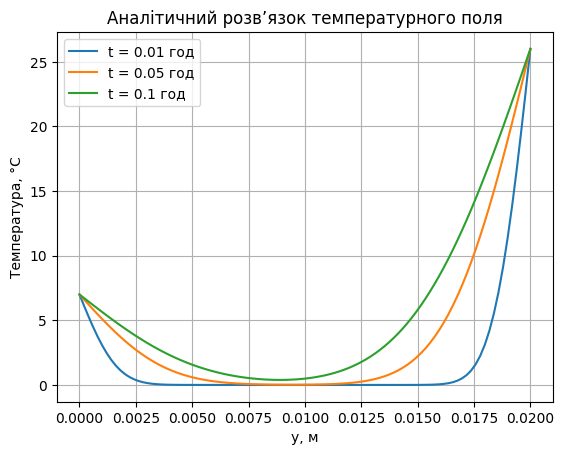

In [209]:
for t in t_values:
  u = analytical_solution(t, y)
  plt.plot(y, u, label=f"t = {t} год")

plt.title("Аналітичний розв’язок температурного поля")
plt.xlabel("y, м")
plt.ylabel("Температура, °C")
plt.legend()
plt.grid(True)
plt.show()

# Завдання 2

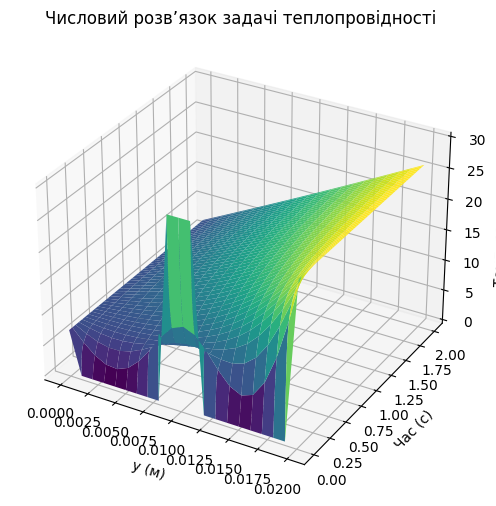

In [210]:
# Побудова 3D-графіка числового розв’язку
T_mesh, Y_mesh = np.meshgrid(time, Y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

u_matrix = np.array(results).T
ax.plot_surface(Y_mesh, T_mesh, u_matrix, cmap='viridis')

ax.set_xlabel("y (м)")
ax.set_ylabel("Час (с)")
ax.set_zlabel("Температура (°C)")
ax.set_title("Числовий розв’язок задачі теплопровідності")
plt.show()

In [211]:
from mpl_toolkits.mplot3d import Axes3D

# Визначення параметрів
L = 0.02
T = 360  # сек
N = 20
h = 0.005
M = int(T / h)
dy = L / N
a = 84.18e-6

In [212]:
time = np.linspace(0, T, M + 1)
Y = np.linspace(0, L, N + 1)

u = np.zeros(N + 1)
results = []
for n in range(M + 1):
  t = n * h
  u[0] = phi1(t)
  u[N] = phi2(t)
  results.append(u.copy())
  u = rk4_step(u, t, h)

In [213]:
# Створюємо сітку для графіка
T_mesh, Y_mesh = np.meshgrid(time, Y, indexing='ij')

# Перетворюємо список на 2D NumPy масив
results = np.array(results)
analytical_results = np.array(U_analytical.T)

# Побудова 3D-графіка
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Числовий розв’язок (теплова карта)
ax.plot_surface(T_mesh, Y_mesh, results, cmap='viridis', alpha=0.7)

# Аналітичний розв’язок (контурна сітка)
ax.plot_wireframe(T_mesh, Y_mesh, analytical_results, color='r', linewidth=0.5)

# Налаштування графіка
ax.set_xlabel("Час (с)")
ax.set_ylabel("Координата y (м)")
ax.set_zlabel("Температура (°C)")
ax.set_title("3D-графік числового та аналітичного розв’язків")

plt.show()

NameError: name 'U_analytical' is not defined

In [ ]:
# Обчислення помилок
MAE = np.max(np.abs(results - analytical_results))
MSE = np.mean((results - analytical_results) ** 2)
print(f"Максимальна абсолютна похибка (MAE): {MAE:.9f}")
print(f"Середньоквадратична похибка (MSE): {MSE:.9f}")

Максимальна абсолютна похибка (MAE): 1.718138606
Середньоквадратична похибка (MSE): 0.000004896
